<a href="https://colab.research.google.com/github/SwethaSrikari/Predicting-EV-charging-demand/blob/main/Web_scraping_Colorado_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[Scraping Boulder Daily Weather data from the NOAA/NWS Cooperative Site](https://psl.noaa.gov/boulder/data.daily.html)**

Check for the regulations of the website you wish to scrape and make sure the data is publicly available.

**How do you find the table number of the table you want to scrape when there are multiple tables?**

1. Right click on the page and Select `Inspect`



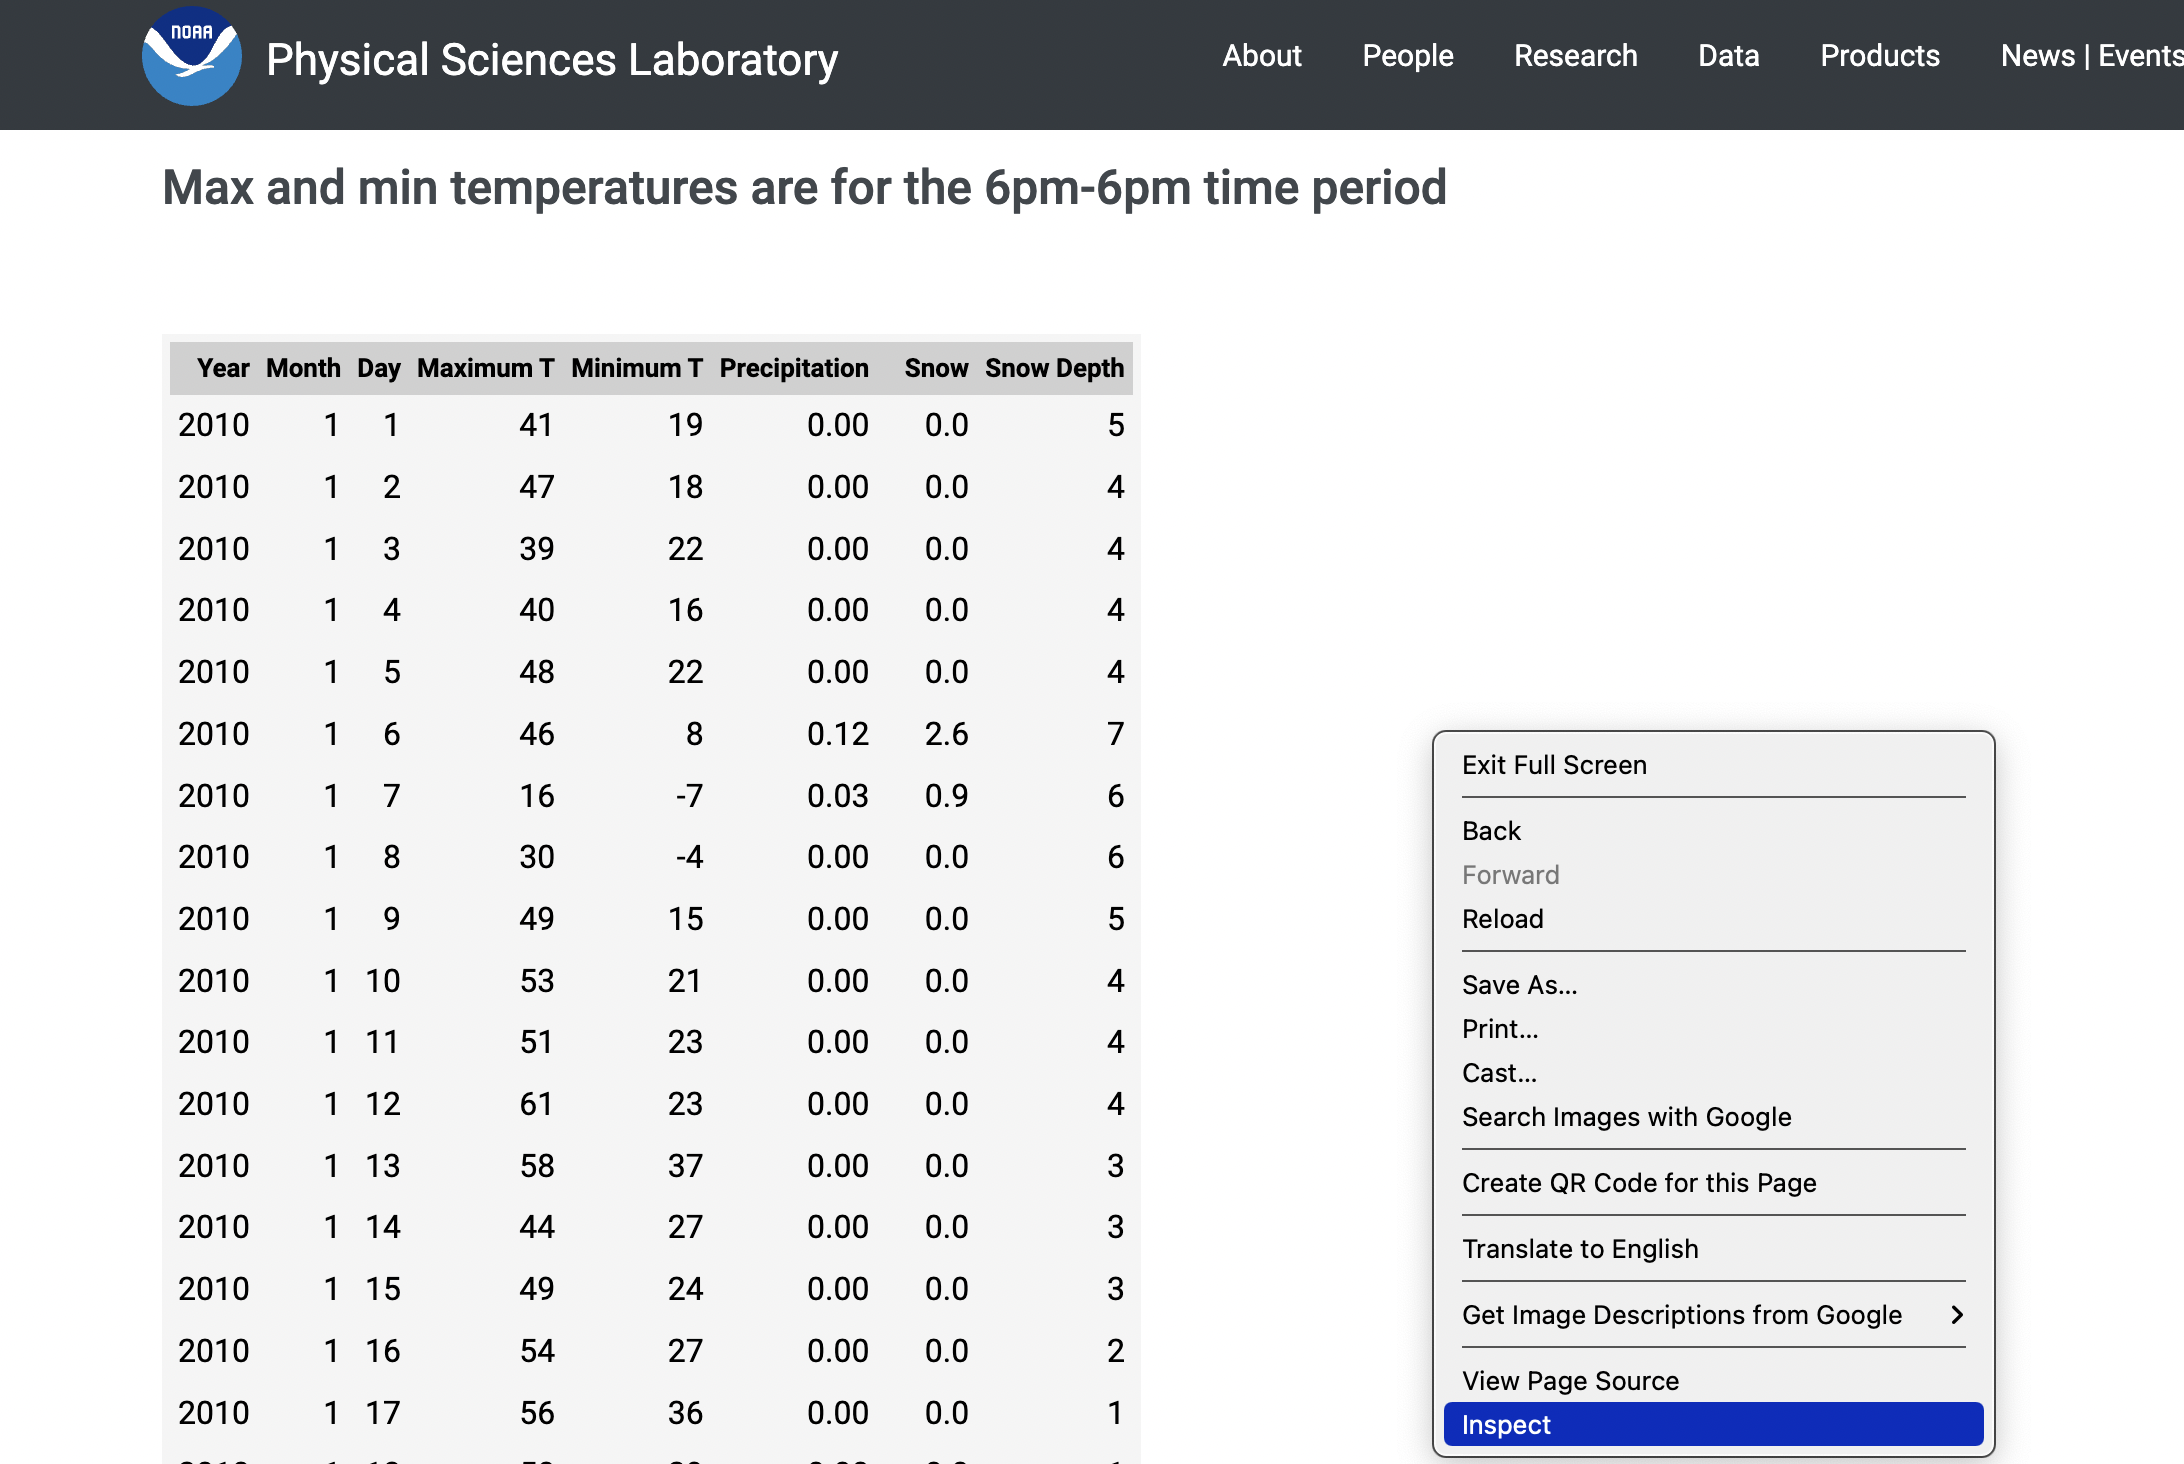

2. A page with html code appears. Select `Console` that appears on top of that page.

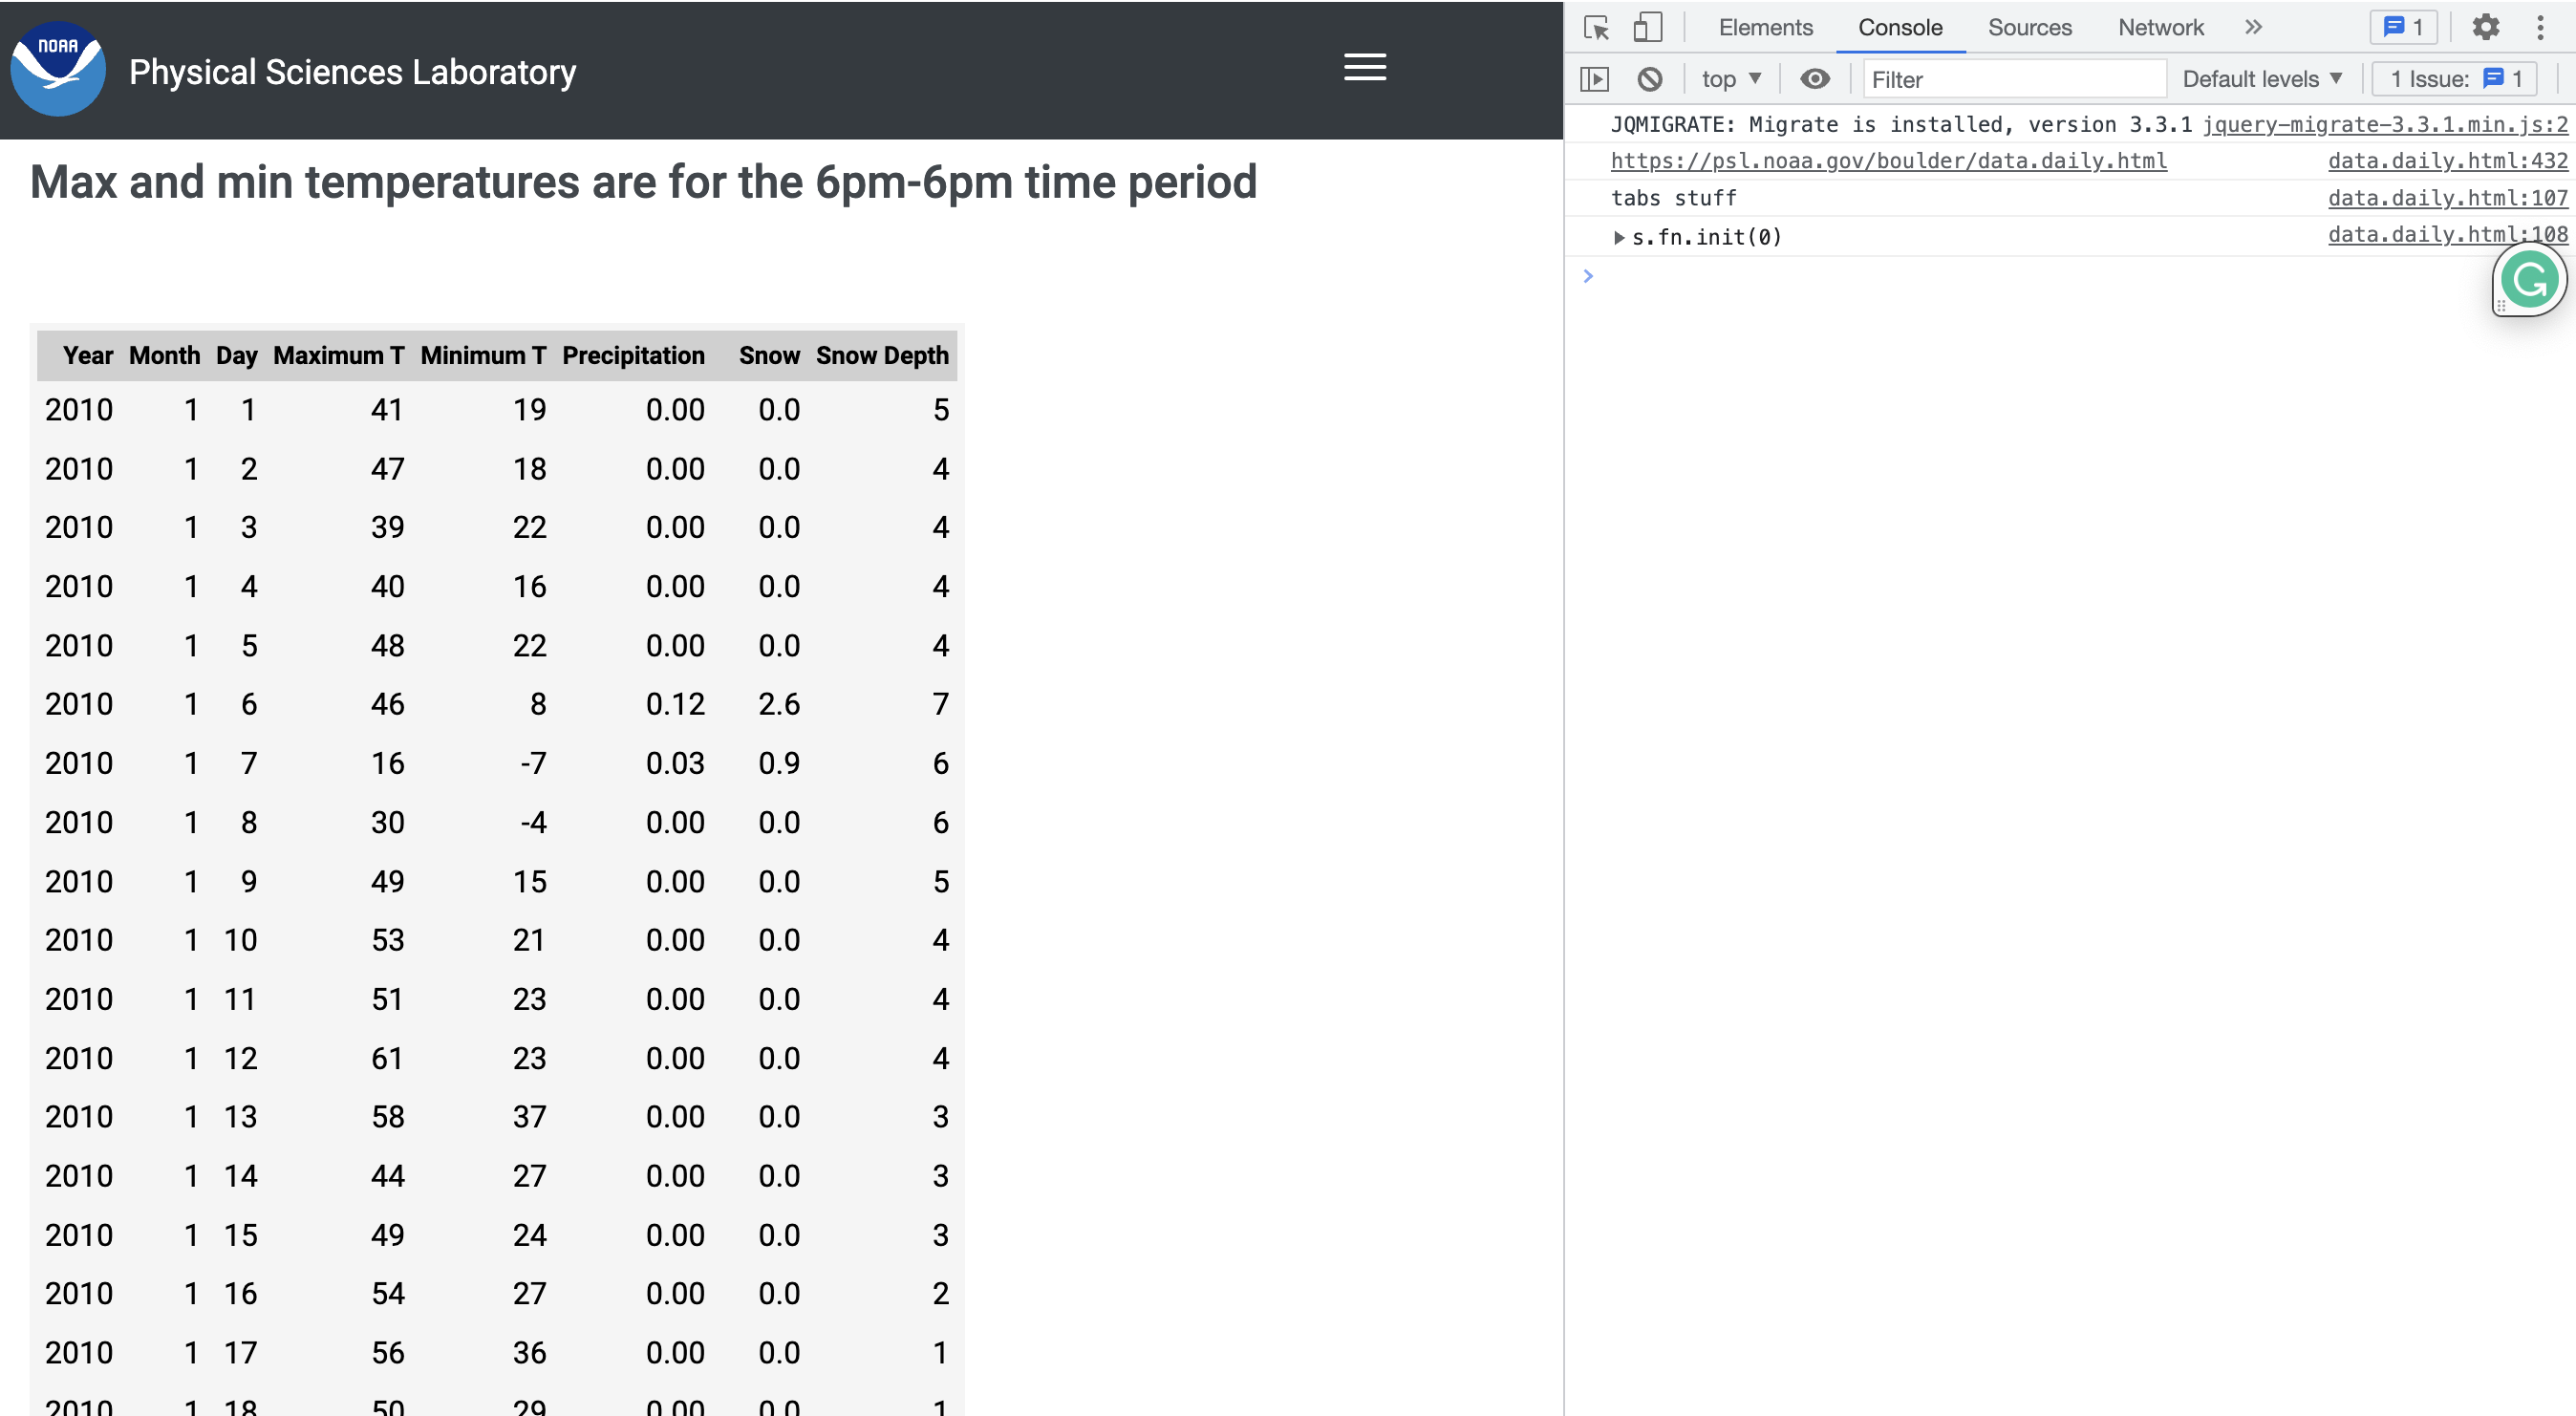

3. Paste this is in the console - 

`var i = 1; [].forEach.call(document.querySelectorAll('table'), 
function(x) { console.log(i++, x); });`


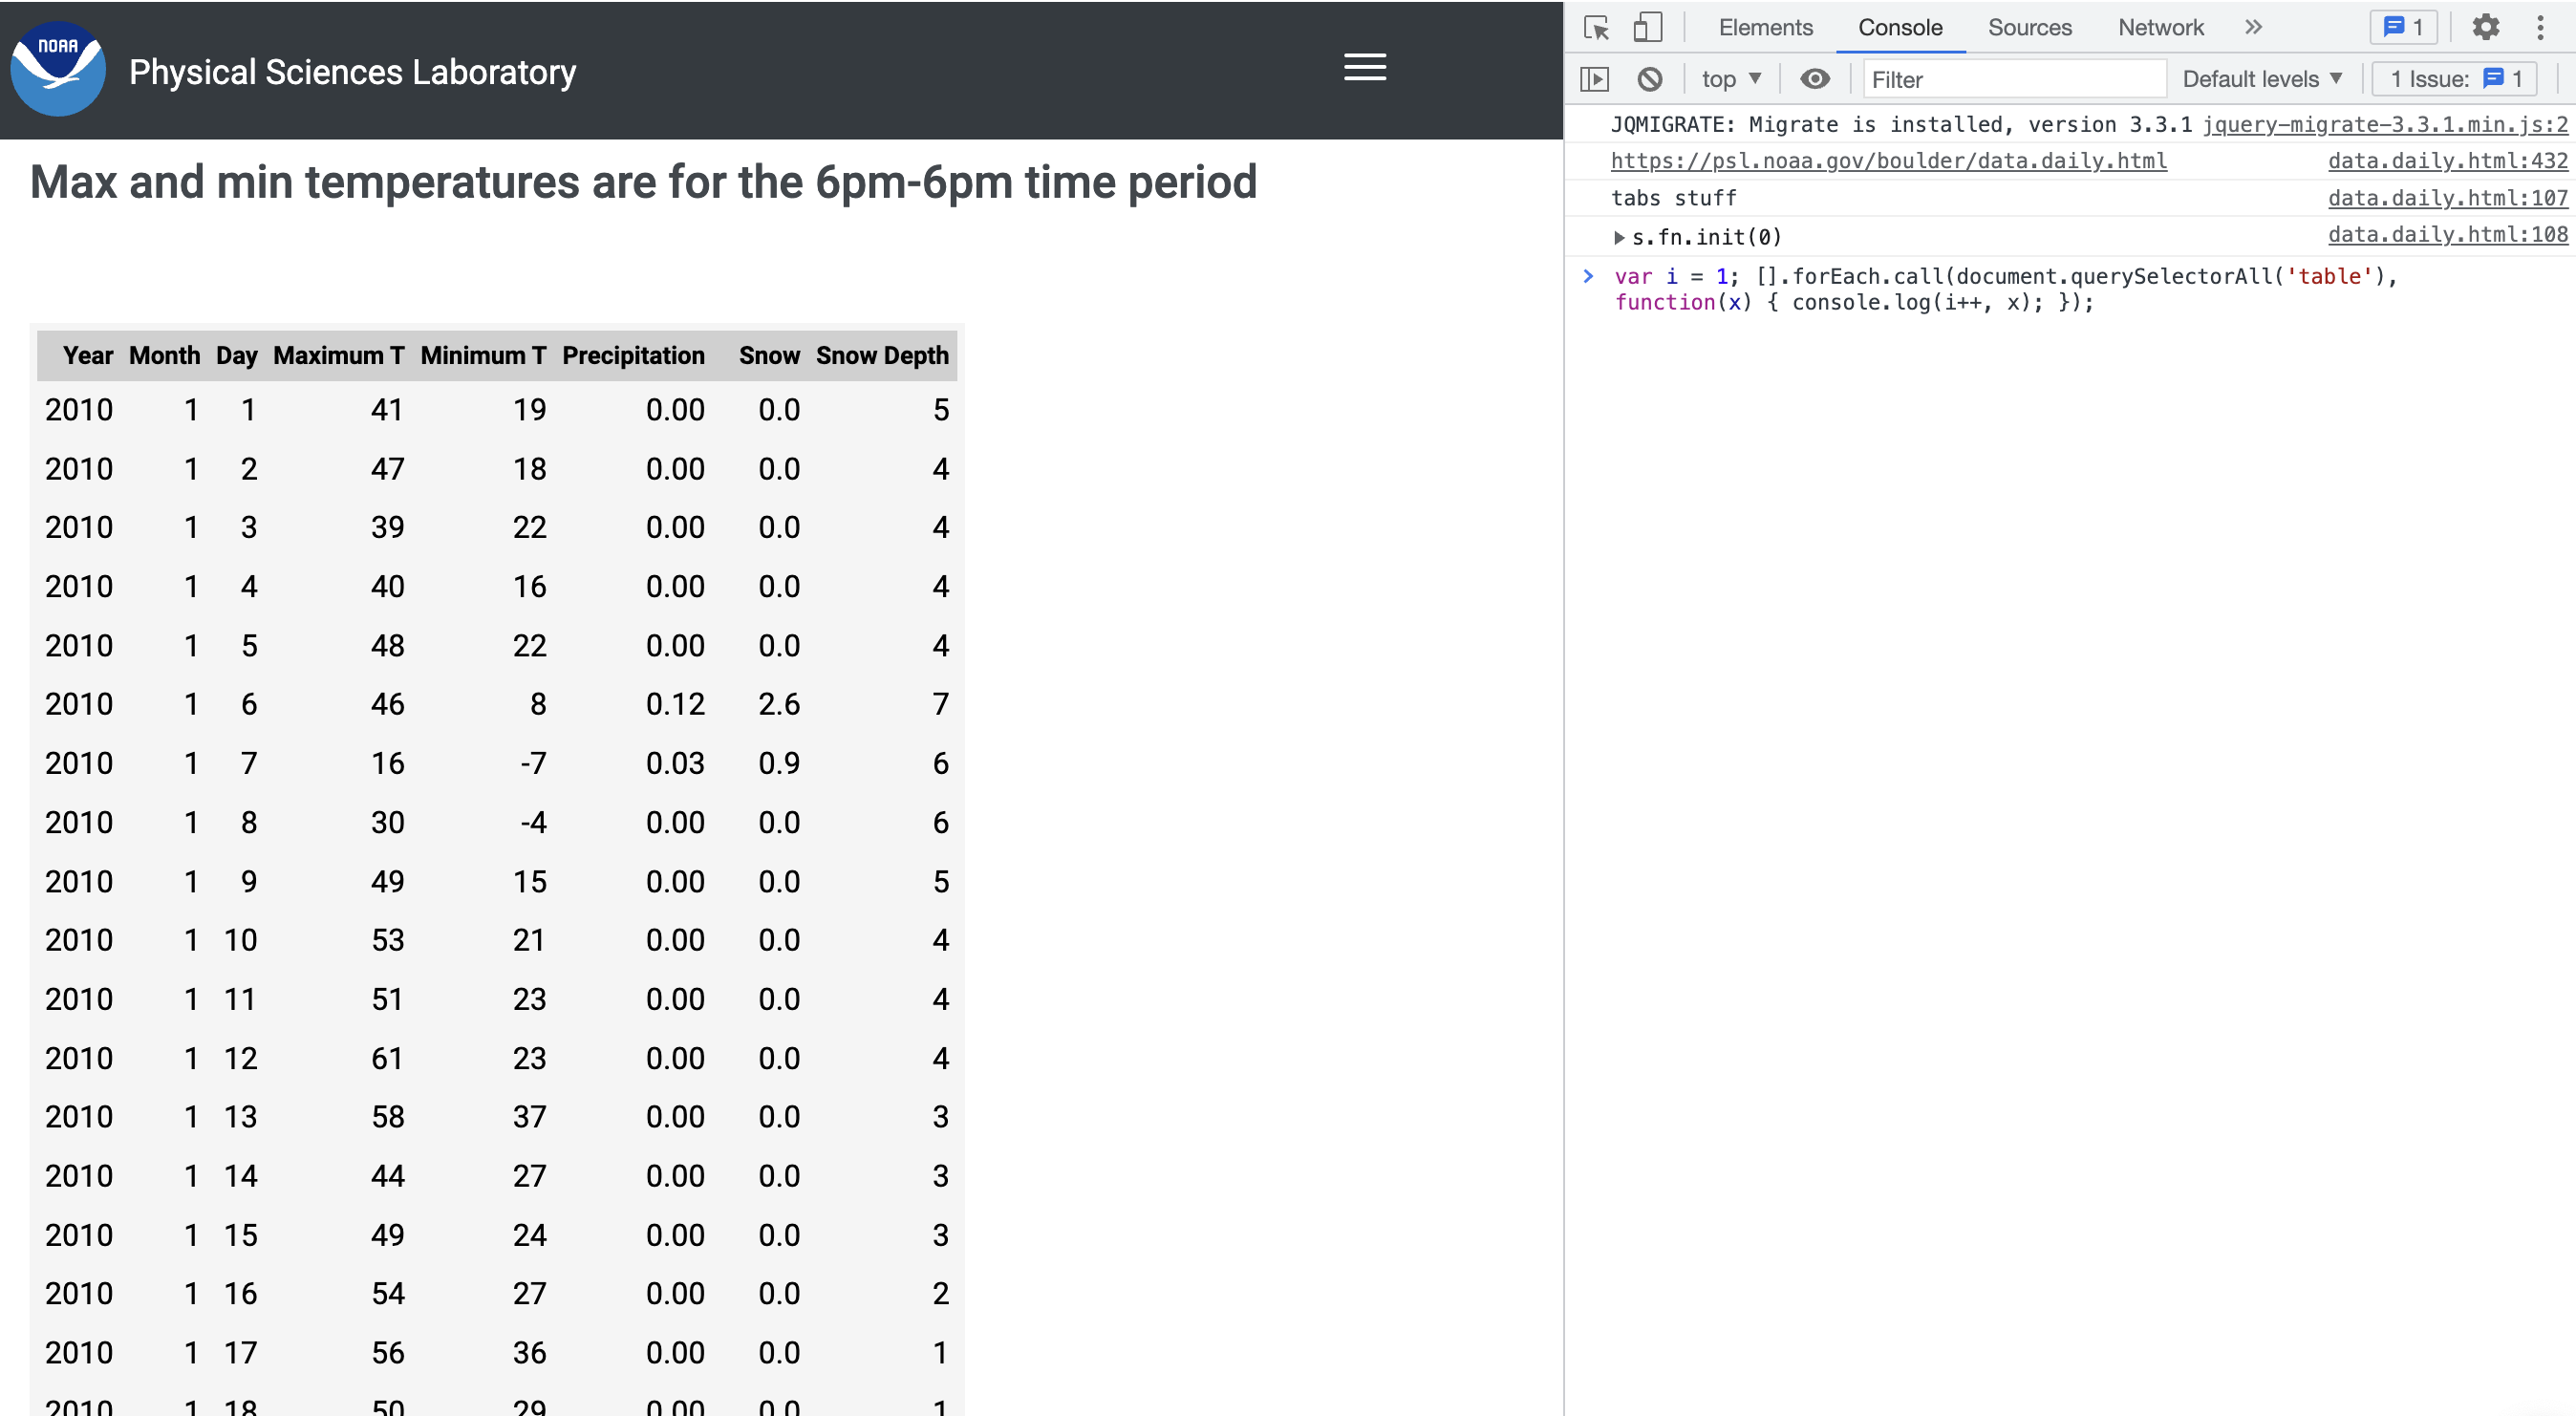

4. It gives you a list of tables and their numbers.


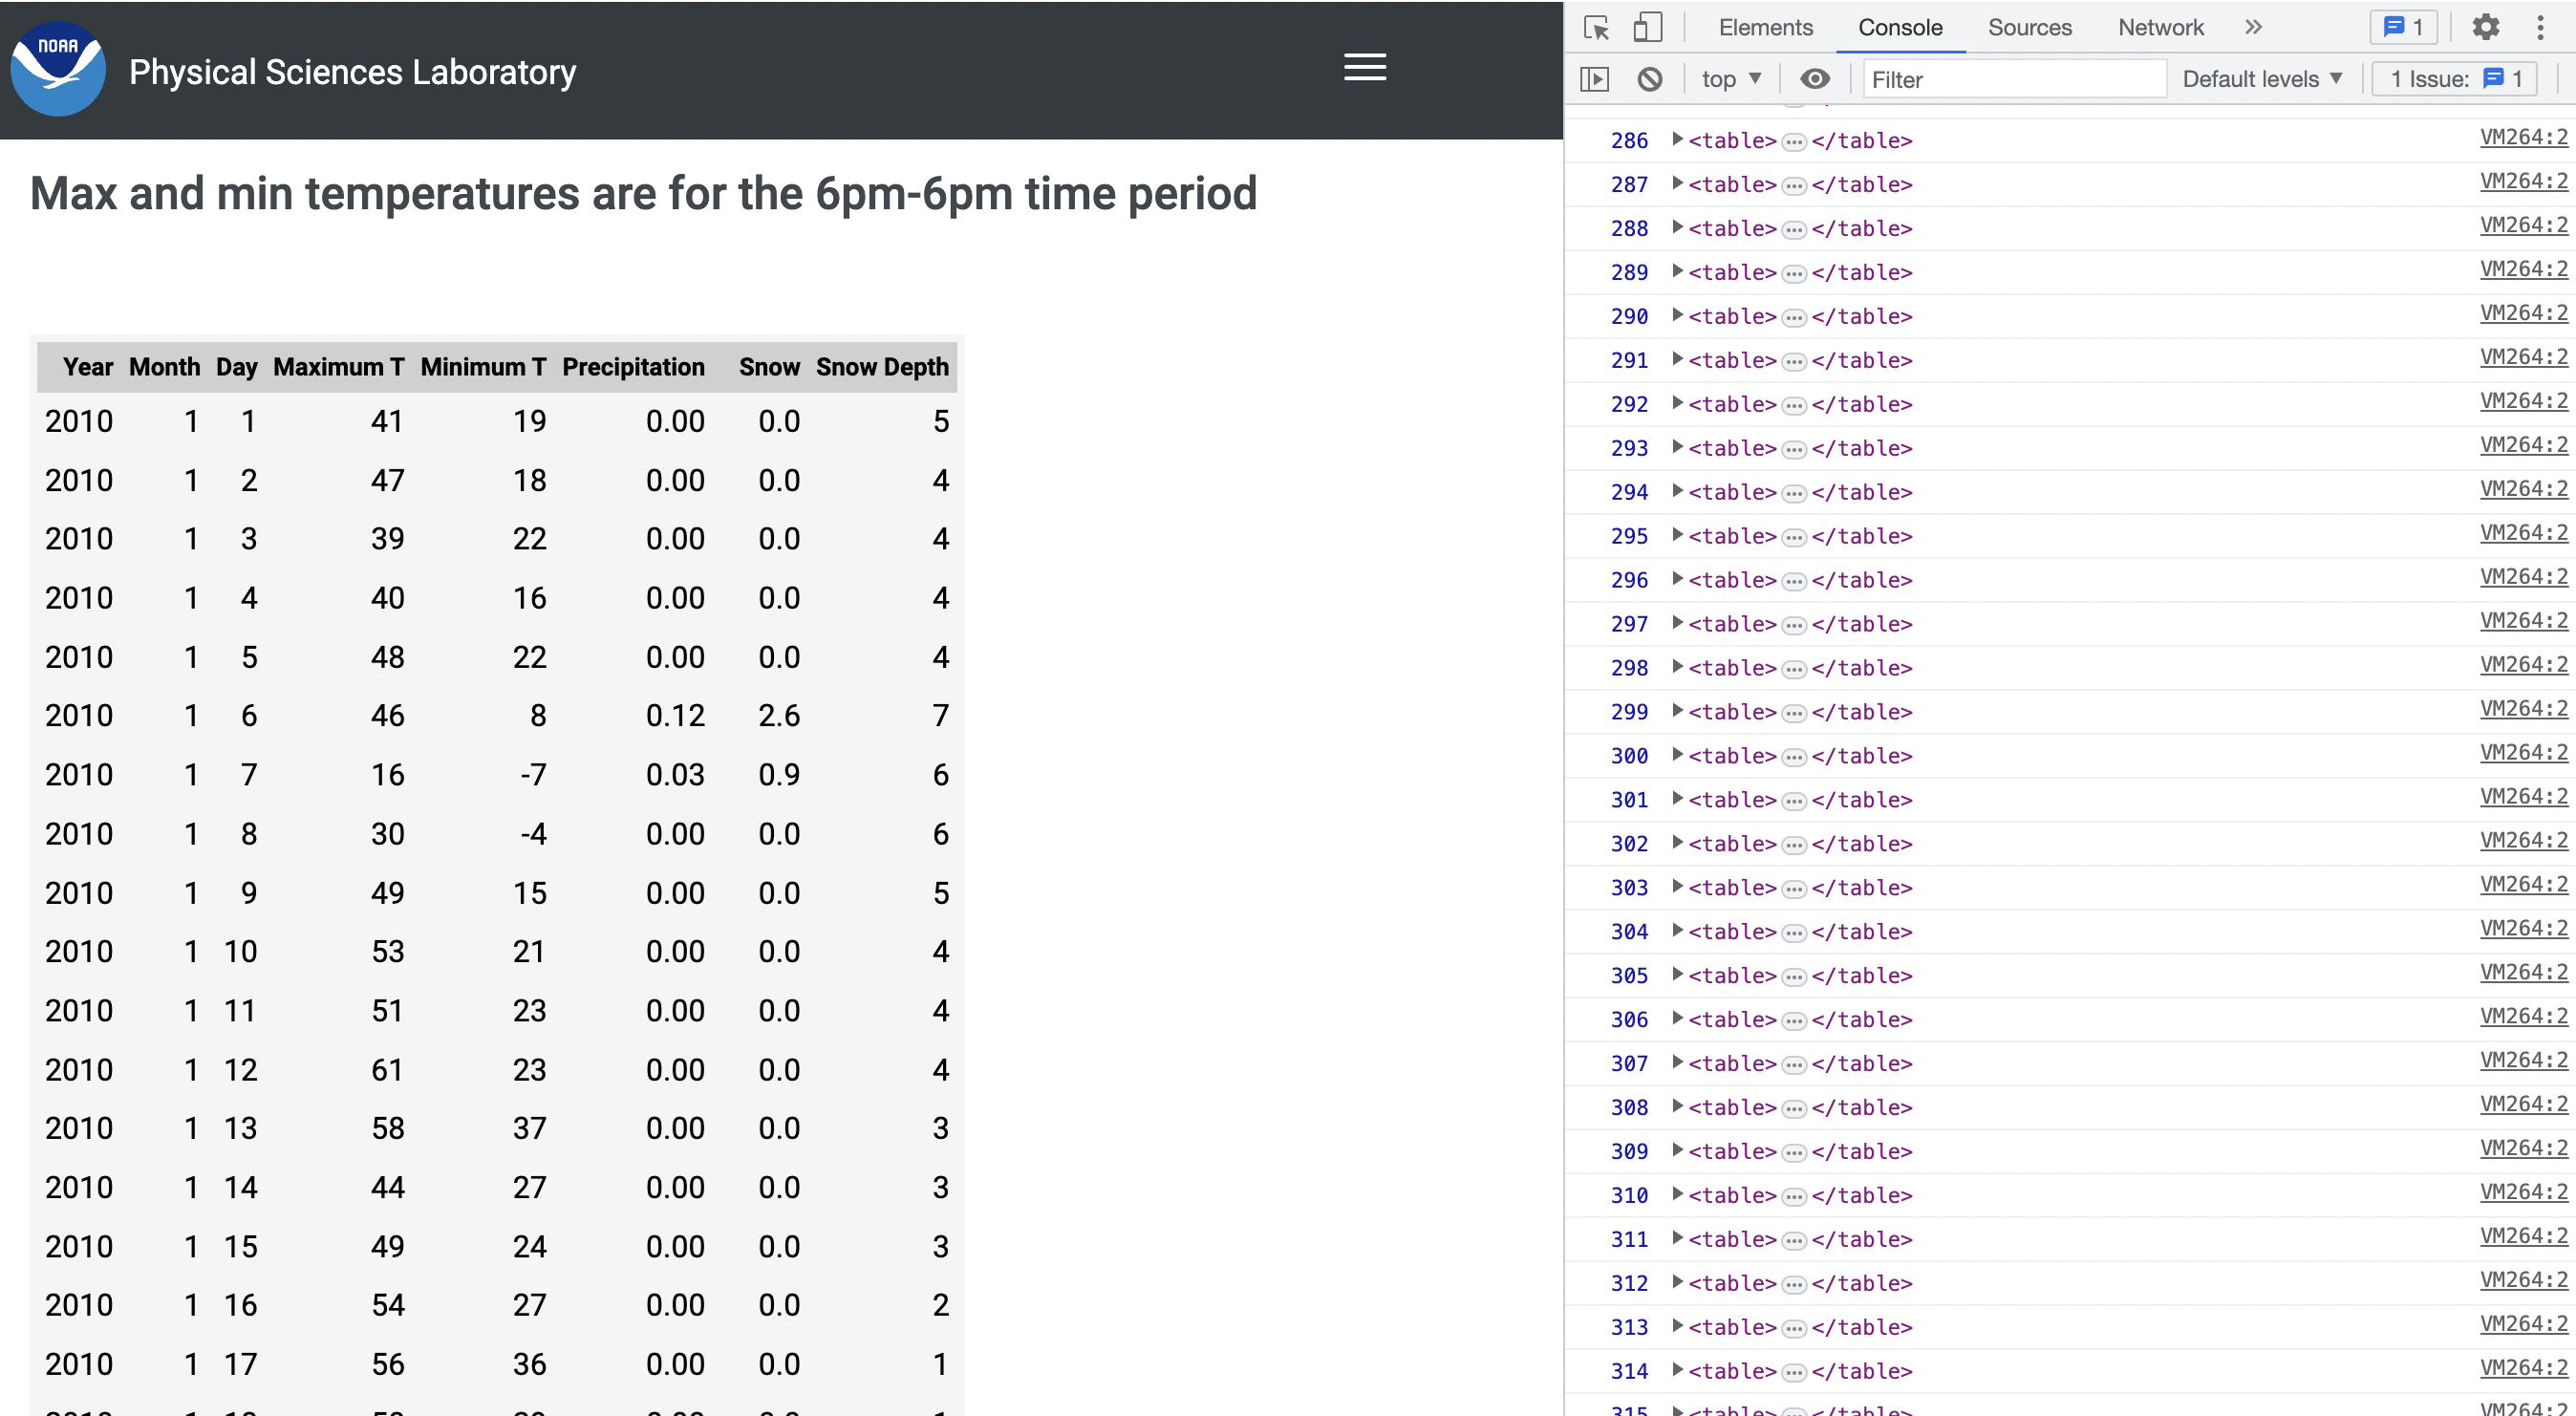

5. If you place your cursor on a table in the `Console` Tab, the corresponding table in the html page will be highlighted

Example - Table 53 is highlighted

You can search for the table number this way

Reference - https://youtu.be/i_nse8KdCkk

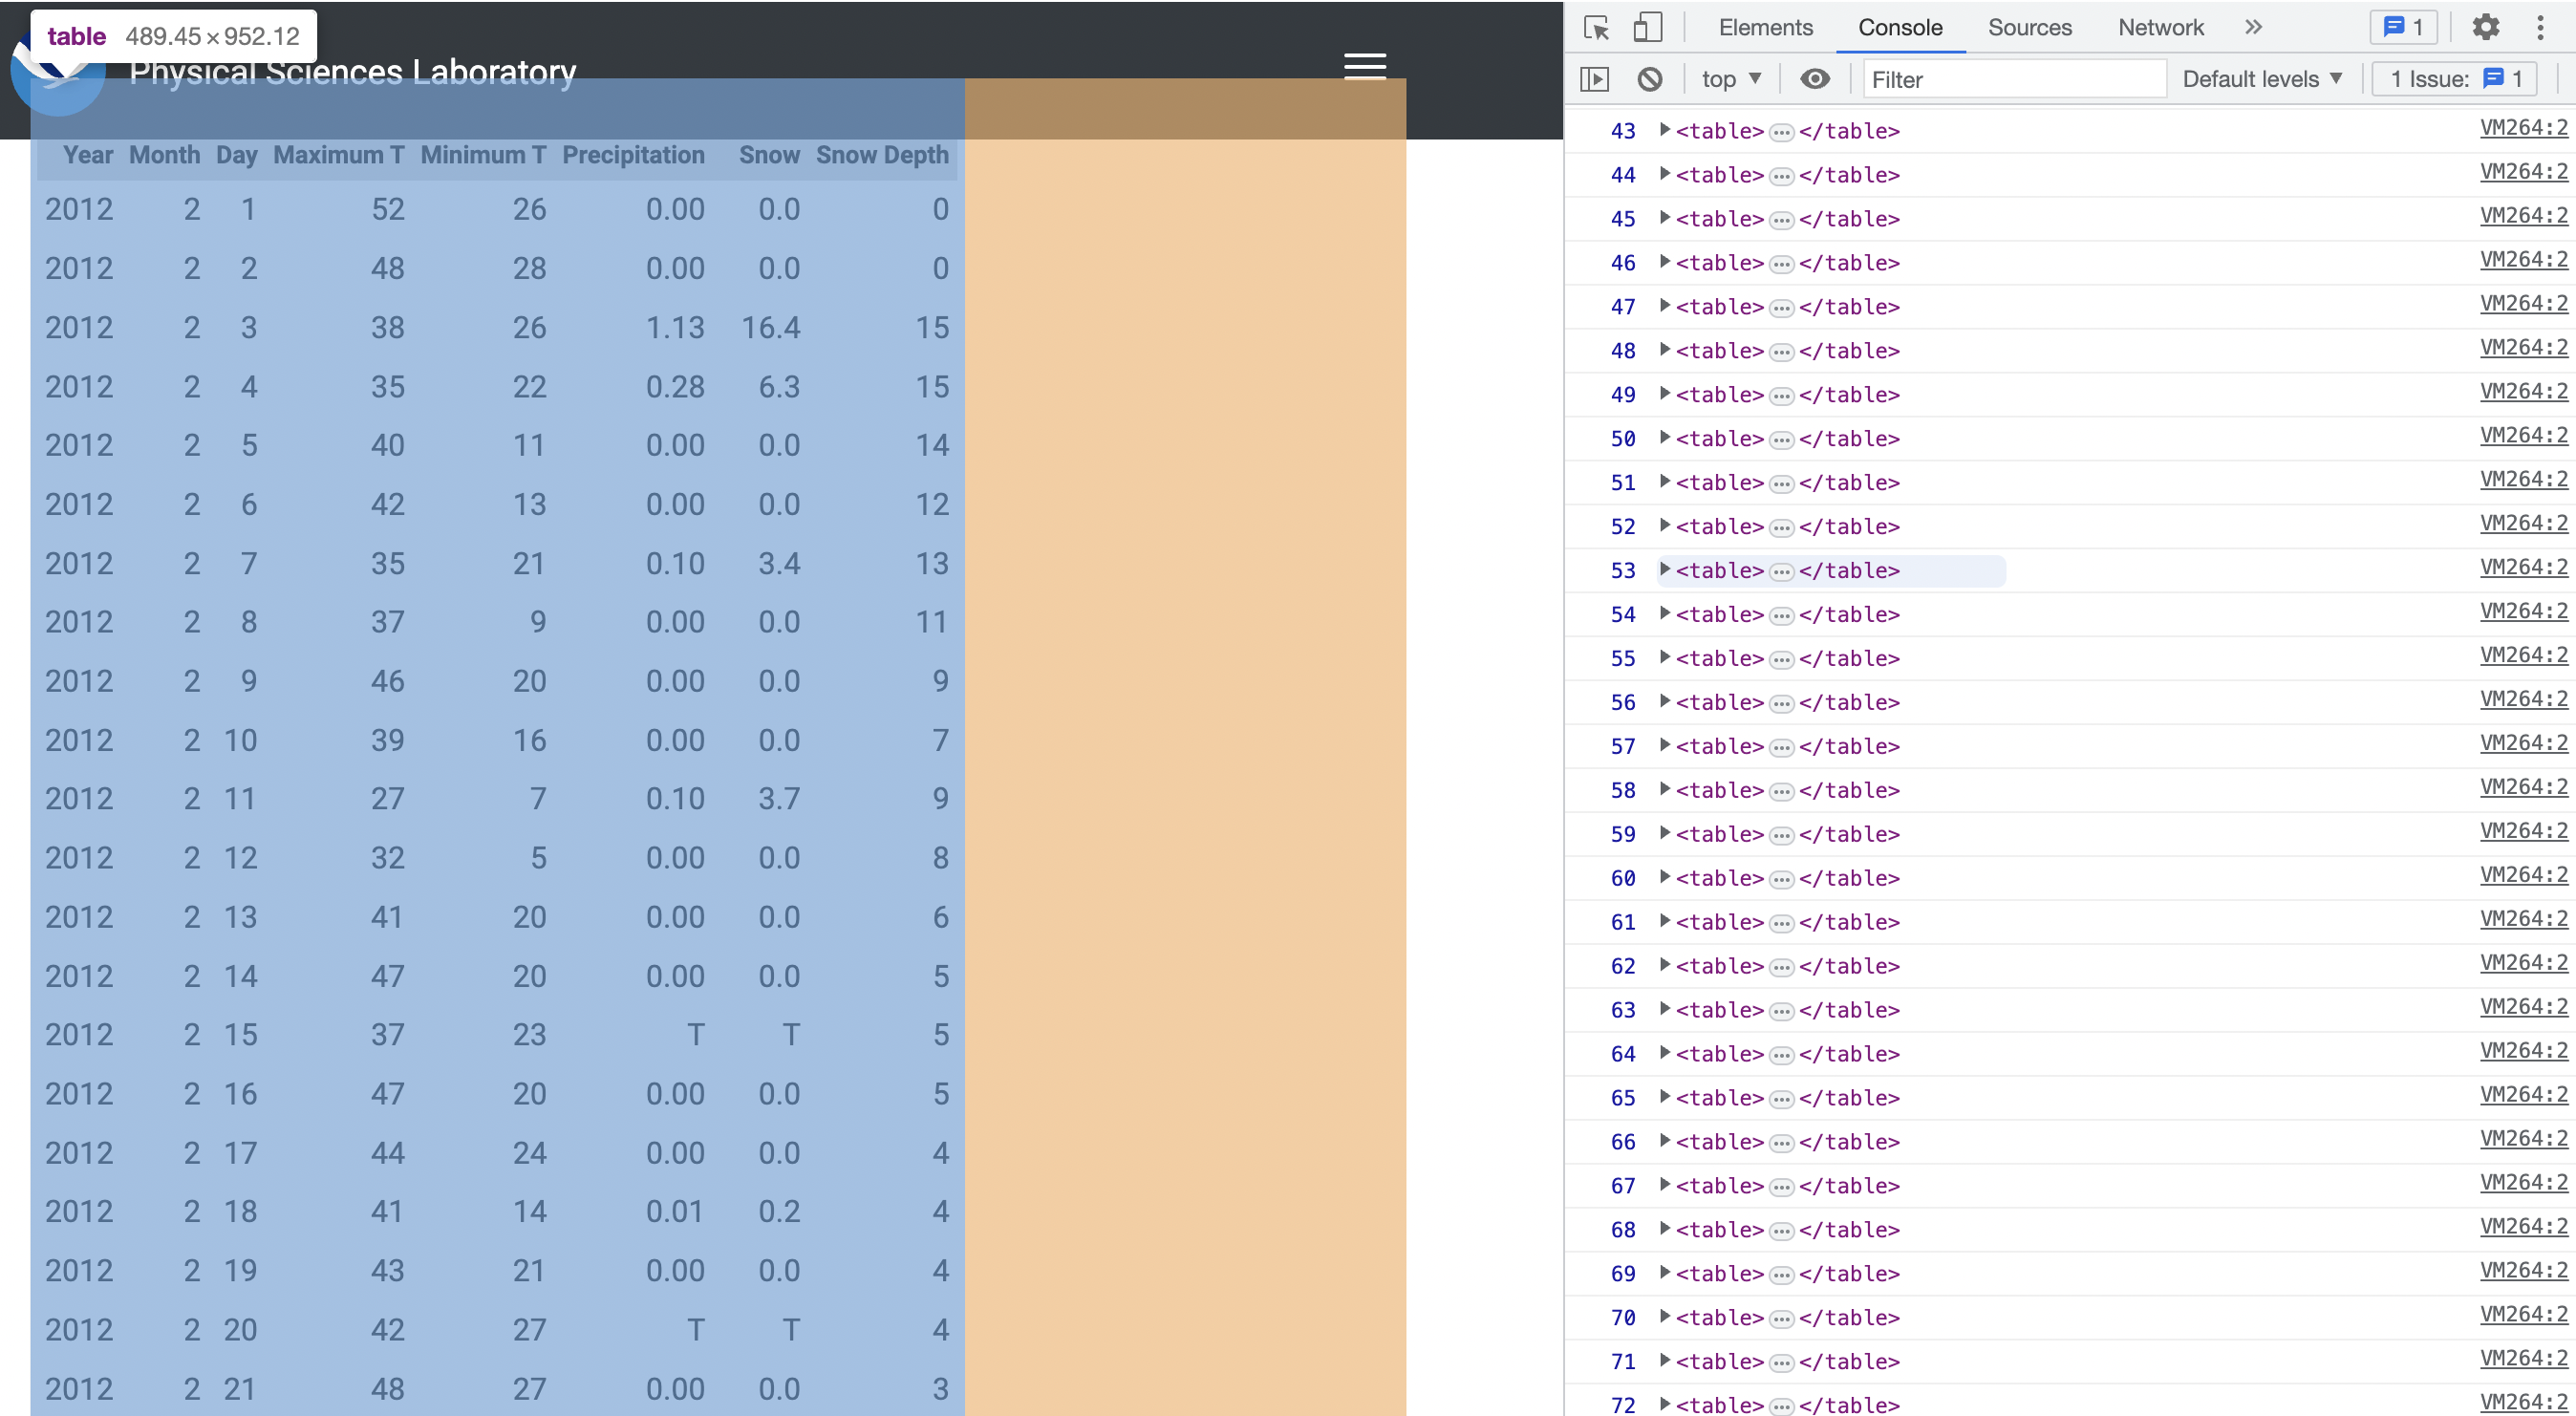

**Find the table numbers using the above method and extract tables from 2018 to 2023**

In [ ]:
# the table numbers were found using the above method - 
tables_year = {'2018': [num for num in range(195, 218, 2)],
               '2019': [num for num in range(219, 242, 2)],
               '2020': [num for num in range(243, 266, 2)],
               '2021': [num for num in range(267, 290, 2)],
               '2022': [num for num in range(291, 314, 2)],
               '2023': [num for num in range(315, 320, 2)]}

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://psl.noaa.gov/boulder/data.daily.html'
response = requests.get(url)
print(response.status_code)

# Turning raw HTML to formatted or parsed data
soup = BeautifulSoup(response.text, 'html.parser')

200


Scraping HTML table and converting it to a pandas dataframe

Note: Modify the script based on the structure of the webpage

In [ ]:
def weather_year(year):
  """
  Scrapes data from https://psl.noaa.gov/boulder/data.daily.html
  Returns a weather dataframe for the specified year (includes all months in the year)

  :param year: The year you want to scrape data from (str)

  Returns a dataframe 
  """
  rows = []
  for table in tables_year[year]:
    for i, child in enumerate(soup.find_all('table')[table].children):
      row = []
      for td in child:
        try:
          row.append(td.text)
        except:
          continue
      if len(row) > 0:
        rows.append(row)
  
  return pd.DataFrame(rows[1:], columns=rows[0]).drop_duplicates(keep=False) # drops duplicate rows

Tables from a HTML page to pandas Dataframe - https://towardsdatascience.com/a-guide-to-scraping-html-tables-with-pandas-and-beautifulsoup-7fc24c331cf7

In [ ]:
df_2018 = weather_year('2018')
df_2018

Year  Month  Day  Maximum T  Minimum T  Precipitation   Snow        Date
0    2018      1    1         30         12         0.0000  0.000  2018-01-01
1    2018      1    2         46         12         0.0000  0.000  2018-01-02
2    2018      1    3         50         20         0.0000  0.000  2018-01-03
3    2018      1    4         52         24         0.0000  0.000  2018-01-04
4    2018      1    5         62         25         0.0000  0.000  2018-01-05
..    ...    ...  ...        ...        ...            ...    ...         ...
372  2018     12   27         34         18         0.0099  0.099  2018-12-27
373  2018     12   28         23         13         0.0099  0.099  2018-12-28
374  2018     12   29         37          5         0.0099  0.099  2018-12-29
375  2018     12   30         50         21         0.0000  0.000  2018-12-30
376  2018     12   31         42          9         0.1300  2.600  2018-12-31

[365 rows x 8 columns]